In predicting the price of a home, there are many variables that factor in to consider.
While predicting the price, the dependent variable, we will be using many independent variables.
We will be using multiple linear regression to do so by using dataset obtained from StreetEast.


In [2]:
#importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importind dataset for manhattan
df = pd.read_csv("streeteasy/manhattan.csv")

#inspecting first few rows
df.head()

#inspecting DataTypes
df.info()

#inspecting how far the apartment in the third row is from the subway station
df[df["rental_id"] == 2790].min_to_subway


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


3    3
Name: min_to_subway, dtype: int64

Train/Test: A method to measure accuracy of the model

The dataset is split into:
Training Set to train the model i.e. create the model
Testing Set to test the model i.e. test the accuracy of the model

Separating data at the beginning provides an unbiased evaluation of the model. 


In [4]:
#Creating a dataframe of independent variables from the main df dataframe
independent_var = df[["bedrooms", "bathrooms", "size_sqft", 
                     "min_to_subway", "floor", "building_age_yrs", 
                     "no_fee", "has_roofdeck", "has_washer_dryer", 
                     "has_doorman", "has_elevator", "has_dishwasher", 
                     "has_patio", "has_gym"]]

#Creating a dataframe for dependent variable
dependent_var = df[["rent"]]

#Splitting independent variables into 80% training set and 20% testing set
x_train, x_test, y_train,y_test = train_test_split(independent_var, dependent_var, train_size=0.8, test_size= 0.2, random_state=6)


 random state is a model hyperparameter used to control the randomness involved in machine learning models.

 None: This is the default value. This allows the function to use the global random state instance from np.random . If you call the same function multiple times with random_state=None, that function will produce different results across different executions.

 int: We can use an integer for random_state . Yes! We can use any integer including 0, but not negative ones, only positive integers. The most popular integers are 0 and 42. When we use an integer for random_state, the function will produce the same results across different executions. The results are only changed if we change the integer value.

The random state hyperparameter in the train_test_split() function controls the shuffling process.

With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control.

With random_state=0 , we get the same train and test sets across different executions. With random_state=42, we get the same train and test sets across different executions, but in this time, the train and test sets are different from the previous case with random_state=0 .

The train and test sets directly affect the model’s performance score. Because we get different train and test sets with different integer values for random_state in the train_test_split() function, the value of the random state hyperparameter indirectly affects the model’s performance score.

We generally use a random state in machine learning models for the following reasons.

Consistency: Sometimes, we need consistent results across different executions of the models. When I write data science tutorials, I always set an integer value for the random state in machine learning models. This is because I need to get the same results when running the model at different times and I want you to get the same results when you try out my code.

Experimental purposes: Sometimes, we tune our models manually. In those cases, we want to keep all other hyperparameters including the random state constant except the one(s) we’re tuning. For that purpose, we can set an integer for the random state in machine learning models.

Increase model performance: Sometimes, you can get significant performance improvement for your model by running it multiple times with different random states. This is because random_state is also a hyperparameter and we can tune that one also to get better results. This is very useful when writing tutorials and at machine learning competitions. But this is not recommended for production environments or other similar practical scenarios where a little change in accuracy score severely affects the end result.

Different types of randomization tasks are involved in machine learning models and other related functions. When splitting a dataset, splitting a node in a decision tree or a random forest, initializing centroids in clustering, randomization takes place. The random state hyperparameter is used to control any such randomness involved in machine learning models to get consistent results.

We can use cross-validation to mitigate the effect of randomness involved in machine learning models.

The random state hyperparameter gives direct control over multiple types of the randomness of different functions.


In [5]:
print(
x_train.head(),
x_test.head(),
y_train.head(),
y_test.head(),
)


      bedrooms  bathrooms  size_sqft  min_to_subway  floor  building_age_yrs  \
605        0.0          1        615              2   38.0                38   
3165       2.0          2       1231              2   20.0                16   
1302       2.0          2       1500              2   23.0                90   
2123       3.0          2       1825             12   20.0                26   
585        1.0          1        900              2    3.0                52   

      no_fee  has_roofdeck  has_washer_dryer  has_doorman  has_elevator  \
605        0             1                 1            0             0   
3165       1             0                 0            0             0   
1302       0             0                 0            0             1   
2123       0             0                 0            0             0   
585        0             1                 1            1             1   

      has_dishwasher  has_patio  has_gym  
605                1     

In [6]:
#Looking at the shapes of the sets
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(2831, 14) (708, 14) (2831, 1) (708, 1)


The .shape attribute for NumPy arrays returns the dimensions of the array. If array has n rows × m columns, then array.shape returns (n, m).

In [7]:
#Creating Liner Regression Model
linmodel = LinearRegression()

#Fitting in into the training stes
linmodel.fit(x_train, y_train)

predictedval = linmodel.predict(x_test)

#predicted y values for all x_test stes
predictedval

array([[ 3206.74211706],
       [ 3847.14817924],
       [ 4425.78377303],
       [ 2825.53009497],
       [ 5841.3080071 ],
       [ 2621.98757614],
       [ 3892.22170587],
       [ 3625.85842968],
       [ 5926.86373978],
       [ 7615.48640874],
       [ 9677.61737054],
       [ 6950.18653716],
       [ 3561.76885285],
       [11635.75018584],
       [ 4689.68372648],
       [ 2869.91499472],
       [ 8102.36092105],
       [ 3267.4344105 ],
       [ 2876.71427783],
       [ 8338.74246474],
       [ 7730.9863434 ],
       [ 3722.39369082],
       [ 1935.6987123 ],
       [ 4940.41662206],
       [11565.3210794 ],
       [ 6222.70579085],
       [ 4502.4954131 ],
       [ 2276.38493743],
       [ 2451.52625891],
       [ 5517.67306166],
       [ 2288.09313982],
       [ 2759.33450117],
       [ 2490.67950573],
       [ 2171.53901411],
       [ 3123.51788326],
       [ 4867.17476808],
       [ 4176.58123485],
       [ 4478.87757589],
       [ 6800.52311835],
       [ 4457.47371912],


Text(0.5, 1.0, 'Actual Rent vs Predicted Rent')

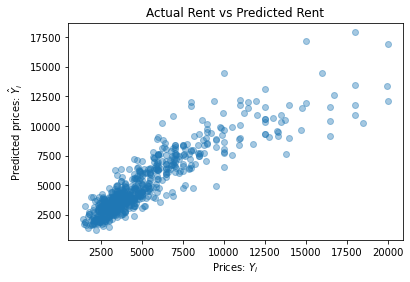

In [8]:
#Creating Scatter Plot

plt.scatter(y_test, predictedval, alpha=0.4) #alpha parameter hels to better understand overlapping points
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")


End of X variables


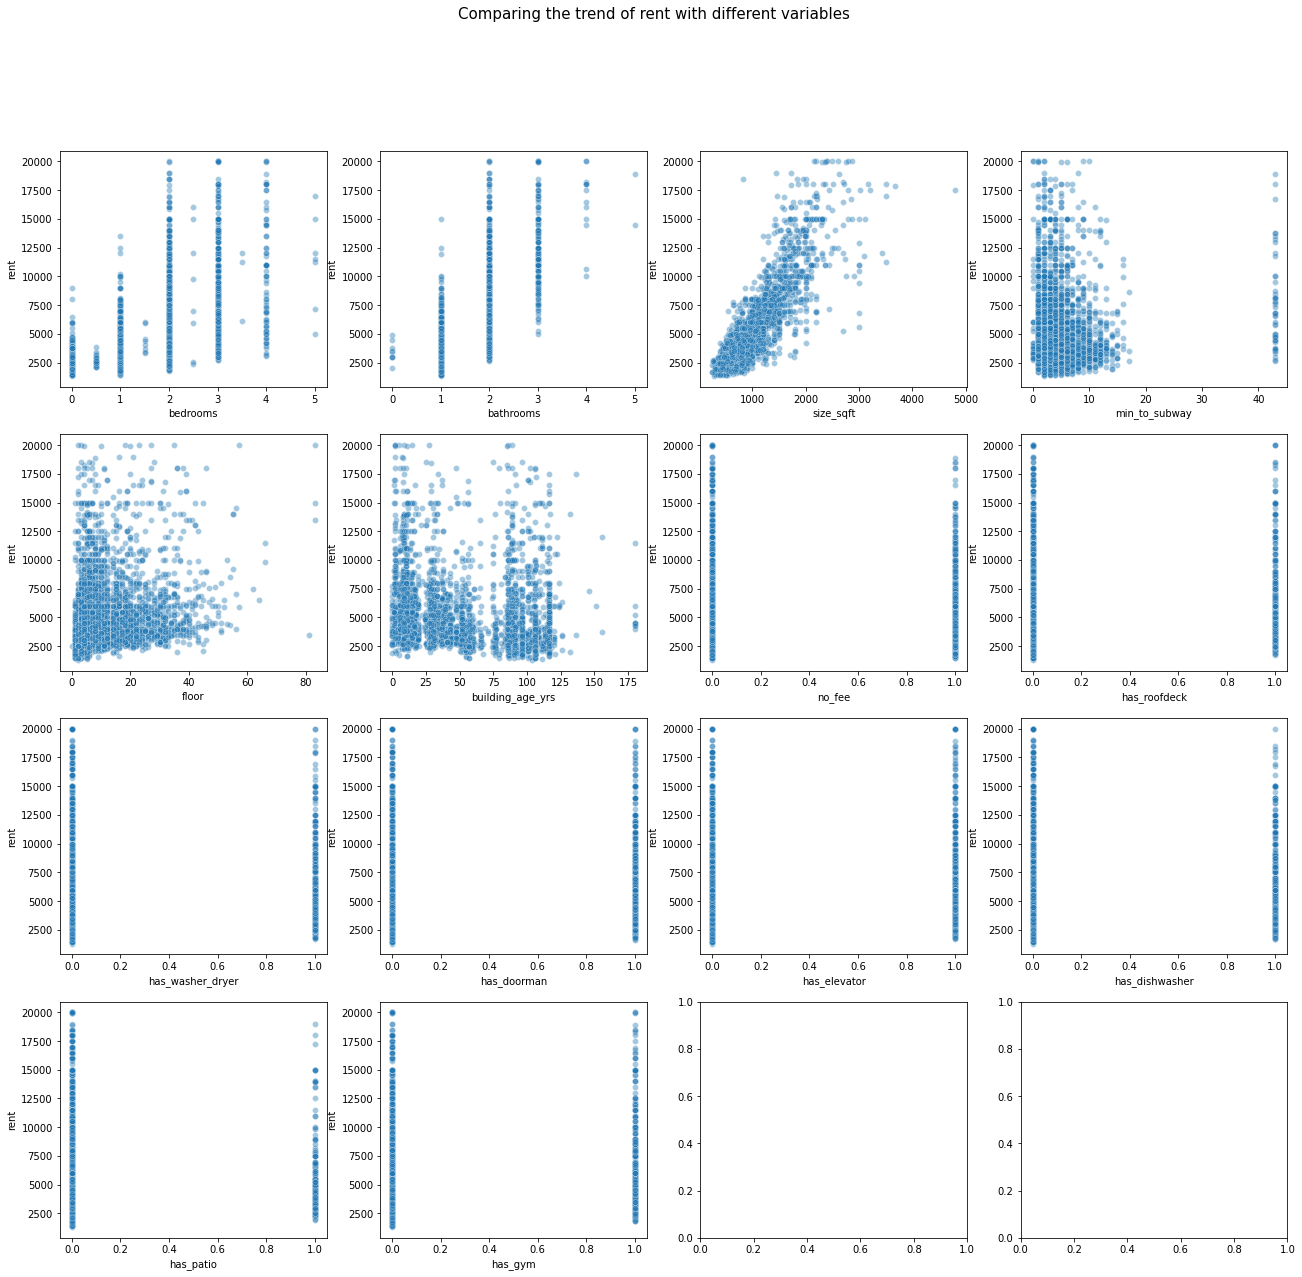

In [47]:
#Comparing rent with individual variables

fig, axes = plt.subplots(4, 4, figsize=(22, 20))
 
fig.suptitle("Comparing the trend of rent with different variables", fontsize= 15)
 
x_vars=["bedrooms", "bathrooms", "size_sqft", 
                     "min_to_subway", "floor", "building_age_yrs", 
                     "no_fee", "has_roofdeck", "has_washer_dryer", 
                     "has_doorman", "has_elevator", "has_dishwasher", 
                     "has_patio", "has_gym"]

y_vars = "rent"

index = 0
for row in range(4):
    for column in range(4):
        try:
            sns.scatterplot(ax=axes[row, column], data=df, x= x_vars[index], y=y_vars, alpha = 0.4)
            index += 1 
        except:
            print("End of X variables") 
            break  
        

In [48]:
#Printing Slop[e and Intercept
print(linmodel.coef_, "\n")
print(linmodel.intercept_)



[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]] 

[-344.68587986]


Text(0, 0.5, 'Rent')

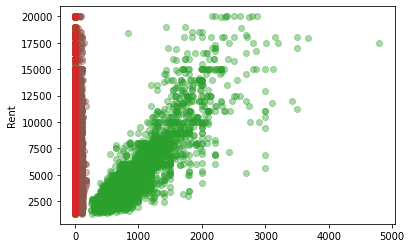

In [53]:
#Visualizing in the same graph
for index in range(len(x_vars)):
    plt.scatter(x= x_vars[index], y=y_vars, alpha = 0.4, data= df)

plt.ylabel("Rent")

Residual Analysis

The difference between the actual value of y and the predicted value of y (Y) is the residual e.
                    e = y-Y

The coefficient of determination Rˆ2 = 1-u/v

where:
u = the residual sum of squares: ((y - y_predict) ** 2).sum()
v = the total sum of squares (TSS): ((y - y.mean()) ** 2).sum()

The TSS tells us how much variation there is int the y variables.

Rˆ2 is the percentage variation in y explained by all the x variables together.

For example, say we are trying to predict rent based on the size_sqft and the bedrooms in the apartment and the R² for our model is 0.72 — that means that all the x variables (square feet and number of bedrooms) together explain 72% variation in y (rent).

Now let’s say we add another x variable, building’s age, to our model. By adding this third relevant x variable, the R² is expected to go up. Let say the new R² is 0.95. This means that square feet, number of bedrooms and age of the building together explain 95% of the variation in the rent.

The best possible R² is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a R² of 0.70 is considered good.




